In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#%matplotlib inline

# Importing the dataset

In [4]:
github_add='https://raw.githubusercontent.com/manojcpatil/PythonDemo/master/'
dataset = pd.read_csv(github_add+'Data/Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [5]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


# Splitting the dataset into the Training set and Test set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting Random Forest Classification to the Training set

In [8]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', 
                                    random_state = 0,oob_score=True)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)

d:\python\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
d:\python\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


# Making the Confusion Matrix

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
display(cm)
accuracy_score(y_test, y_pred)

array([[63,  5],
       [ 4, 28]], dtype=int64)

0.91

In [10]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train

In [11]:
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                               stop = X_set[:, 0].max() + 1, 
                               step =0.01), 
                     np.arange(start = X_set[:, 1].min() - 1, 
                               stop = X_set[:, 1].max() + 1, 
                               step = 0.01))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


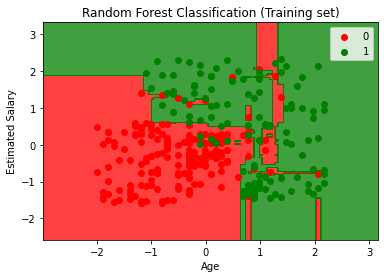

In [12]:
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
    c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Visualising the Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


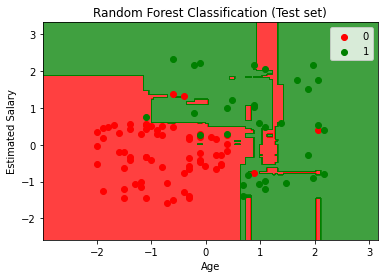

In [13]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step =
0.01),
np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
    c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [14]:
from sklearn import tree

In [20]:
fig=plt.figure(figsize=(25,20))
tree.export_graphviz(classifier[0],feature_names=['Age','Estimated Salary'],filled=True)

'digraph Tree {\nnode [shape=box, style="filled", color="black"] ;\n0 [label="Age <= 0.631\\nentropy = 0.965\\nsamples = 187\\nvalue = [183, 117]", fillcolor="#f6d2b8"] ;\n1 [label="Estimated Salary <= 0.49\\nentropy = 0.678\\nsamples = 134\\nvalue = [174, 38]", fillcolor="#eb9d64"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Age <= -0.161\\nentropy = 0.169\\nsamples = 104\\nvalue = [156, 4]", fillcolor="#e6843e"] ;\n1 -> 2 ;\n3 [label="entropy = 0.0\\nsamples = 71\\nvalue = [108, 0]", fillcolor="#e58139"] ;\n2 -> 3 ;\n4 [label="Estimated Salary <= -0.06\\nentropy = 0.391\\nsamples = 33\\nvalue = [48, 4]", fillcolor="#e78c49"] ;\n2 -> 4 ;\n5 [label="entropy = 0.0\\nsamples = 17\\nvalue = [28, 0]", fillcolor="#e58139"] ;\n4 -> 5 ;\n6 [label="Age <= 0.334\\nentropy = 0.65\\nsamples = 16\\nvalue = [20, 4]", fillcolor="#ea9a61"] ;\n4 -> 6 ;\n7 [label="Estimated Salary <= 0.027\\nentropy = 0.454\\nsamples = 14\\nvalue = [19, 2]", fillcolor="#e88e4e"] ;\n6 -> 

<Figure size 1800x1440 with 0 Axes>

In [17]:
fig.show()

<ipython-input-17-6ebedab27258>:1: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


In [18]:
!pip install pyqt5

     ---------------------------------------- 6.7/6.7 MB 737.2 kB/s eta 0:00:00
     -------------------------------------- 77.8/77.8 KB 619.4 kB/s eta 0:00:00
     ---------------------------------------- 50.1/50.1 MB 1.4 MB/s eta 0:00:00
